## Restaurant Analysis of 10 Best Foodie Cities in America

https://www.cnbc.com/2018/11/05/wallethub-best-food-cities-in-america.html

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import gmaps
from config import ykey, gkey
from func import avg_price_cat, top_five, info_box_text

In [2]:
# List of cities from article

cities = ['Portland, OR', 'San Francisco, CA', 'Miami, FL', 'New York, NY', 'Los Angeles, CA', 
          'Orlando, FL', 'Las Vegas, NV', 'Seattle, WA', 'San Diego, CA', 'Austin, TX']

In [3]:
# Get data from Yelp

yelp_url = 'https://api.yelp.com/v3/businesses/search'
yelp_headers = {'Authorization': 'Bearer %s' % ykey}

# Columns for DataFrame

name_list = []
city_list = []
state_list = []
category_list = []
rating_list = []
review_count_list = []
price_list = []

for city in cities:
    print(f'Retrieving restaurants in {city}')
    yelp_params = {'location' : city, 'term': 'restaurants', 'limit' : '50'}
    yelp_response = requests.get(yelp_url, yelp_params, headers = yelp_headers)
    yelp_data = yelp_response.json()
    restaurant_data = yelp_data['businesses']

    for restaurant in restaurant_data:
        
        for category in restaurant['categories']:            
            name_list.append(restaurant['name'])
            city_list.append(restaurant['location']['city'])
            state_list.append(restaurant['location']['state'])
            category_list.append(category['title'])
            rating_list.append(restaurant['rating'])
            review_count_list.append(restaurant['review_count'])
            
            try:                
                price_list.append(restaurant['price'])
            
            except:
                price_list.append('')     

Retrieving restaurants in Portland, OR
Retrieving restaurants in San Francisco, CA
Retrieving restaurants in Miami, FL
Retrieving restaurants in New York, NY
Retrieving restaurants in Los Angeles, CA
Retrieving restaurants in Orlando, FL
Retrieving restaurants in Las Vegas, NV
Retrieving restaurants in Seattle, WA
Retrieving restaurants in San Diego, CA
Retrieving restaurants in Austin, TX


In [4]:
# Create DataFrame for all city restaurants

restaurants_pd = pd.DataFrame({'Name' : name_list, 'City' : city_list, 'State' : state_list, 'Category' : category_list, 
                               'Rating' : rating_list, 'Review Count' : review_count_list, 'Price' : price_list})

restaurants_pd.head()

,Name,City,State,Category,Rating,Review Count,Price
0,Screen Door,Portland,OR,Southern,4.5,6377,$$
1,Screen Door,Portland,OR,Cajun/Creole,4.5,6377,$$
2,Screen Door,Portland,OR,Breakfast & Brunch,4.5,6377,$$
3,Tasty n Alder,Portland,OR,American (New),4.5,3468,$$
4,Tasty n Alder,Portland,OR,Breakfast & Brunch,4.5,3468,$$


In [5]:
# Cleanup DataFrame by replacing/combining values and removing categories that don't reflect foot type

restaurants_pd = restaurants_pd[restaurants_pd.Price != '']
restaurants_pd['Price'].replace({'$$$$$' : 5, '$$$$' : 4, '$$$' : 3, '$$' : 2, '$' : 1}, inplace = True)
restaurants_pd['Price'] = pd.to_numeric(restaurants_pd['Price'])

restaurants_pd['Category'].replace(['American (New)', 'American (Traditional)'], 'American', inplace = True)
restaurants_pd['Category'].replace(['Beer Bar', 'Beer, Wine & Spirits', 'Brewpubs', 'Cocktail Bars', 
                                    'Wine Bars', 'Beer Gardens', 'Pubs', 'Gastropubs', 
                                    'Izakaya', 'Sports Bars'], 'Bars', inplace = True)
restaurants_pd['Category'].replace(['Coffee & Tea', 'Bubble Tea', 'Hong Kong Style Cafe'], 'Cafes', inplace = True)
restaurants_pd['Category'].replace(['Cupcakes', 'Custom Cakes', 'Patisserie/Cake Shop'], 'Desserts', inplace = True)
restaurants_pd['Category'].replace(['Seafood Markets'], 'Seafood', inplace = True)
restaurants_pd['Category'].replace(['Smokehouse'], 'Barbeque', inplace = True)
restaurants_pd['Category'].replace(['Empanadas'], 'Latin American', inplace = True)
restaurants_pd['Category'].replace(['Japanese Curry'], 'Japanese', inplace = True)
restaurants_pd['Category'].replace(['New Mexican Cuisine'], 'Mexican', inplace = True)
restaurants_pd['Category'].replace(['Cheesesteaks'], 'Sandwiches', inplace = True)
restaurants_pd['Category'].replace(['Tapas Bars'], 'Tapas/Small Plates', inplace = True)
restaurants_pd['Category'].replace(['Chicken Wings'], 'Chicken Shop', inplace = True)
restaurants_pd['Category'].replace(['Southern'], 'Soul Food', inplace = True)
restaurants_pd['Category'].replace(['Tacos'], 'Mexican', inplace = True)
restaurants_pd['Category'].replace(['Pasta Shops'], 'Italian', inplace = True)
restaurants_pd['Category'].replace(['Sushi Bars', 'Ramen'], 'Japanese', inplace = True)

restaurants_pd = restaurants_pd.loc[(restaurants_pd.Category != 'Bookstores') &
                                    (restaurants_pd.Category != 'Home Decor') &
                                    (restaurants_pd.Category != 'Music Venues') &
                                    (restaurants_pd.Category != 'Lounges') &
                                    (restaurants_pd.Category != 'Food') &
                                    (restaurants_pd.Category != 'Caterers') &
                                    (restaurants_pd.Category != 'Cheese Shops') &
                                    (restaurants_pd.Category != 'Tabletop Games') &
                                    (restaurants_pd.Category != 'Street Vendors') &
                                    (restaurants_pd.Category != 'Food Trucks') &
                                    (restaurants_pd.Category != 'Food Stands') &
                                    (restaurants_pd.Category != 'Food Court') &
                                    (restaurants_pd.Category != 'Popcorn Shops') &
                                    (restaurants_pd.Category != 'Venues & Event Spaces') &
                                    (restaurants_pd.Category != 'Flea Markets')]

restaurants_pd = restaurants_pd.loc[(restaurants_pd['City'] == 'Portland') | 
                                    (restaurants_pd['City'] == 'San Francisco') |
                                    (restaurants_pd['City'] == 'Miami') | 
                                    (restaurants_pd['City'] == 'New York') |
                                    (restaurants_pd['City'] == 'Los Angeles') | 
                                    (restaurants_pd['City'] == 'Orlando') |
                                    (restaurants_pd['City'] == 'Las Vegas') | 
                                    (restaurants_pd['City'] == 'Seattle') |
                                    (restaurants_pd['City'] == 'San Diego') | 
                                    (restaurants_pd['City'] == 'Austin')]

restaurants_pd.drop_duplicates(keep = False, inplace = True)

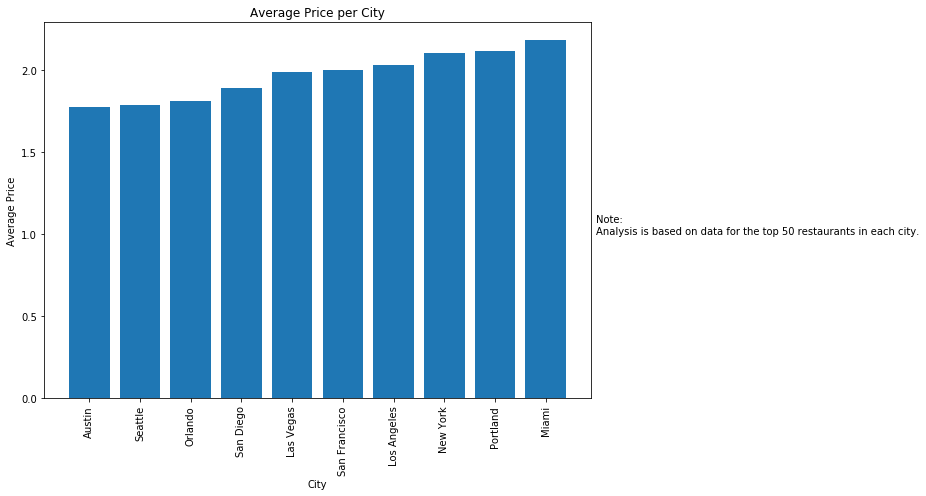

In [6]:
# Plot for average price per city

avg_price = restaurants_pd.groupby('City')['Price'].mean()
avg_price = avg_price.sort_values()

plt.figure(figsize = (13, 7))
plt.bar(avg_price.keys(), avg_price)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price per City')
plt.xticks(rotation=90)
plt.text(10, 1, 'Note:\nAnalysis is based on data for the top 50 restaurants in each city.')
plt.tight_layout()

# plt.show()

plt.savefig("Output/Average_Price.png")

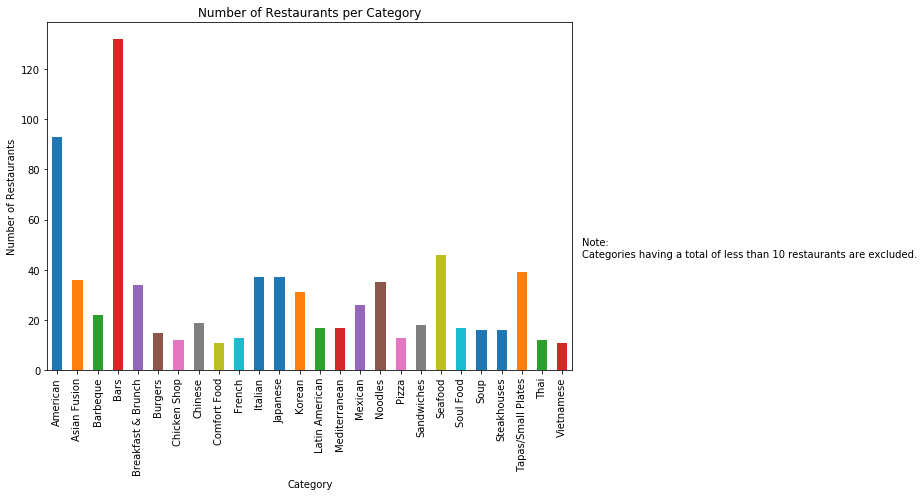

In [7]:
# Plot for number of restaurants per category across all cities

# Top categories with 10 or more restaurants
grouped_df = restaurants_pd.groupby('Category').filter(lambda x: x['Name'].count() >= 10)
top_cat_df = grouped_df.groupby('Category')['Name'].count()

plt.figure(figsize = (13, 7))
top_cat_plot = top_cat_df.plot(kind = 'bar')
top_cat_plot.set_ylabel("Number of Restaurants")
top_cat_plot.set_title("Number of Restaurants per Category")
top_cat_plot.text(26, 45, 'Note:\nCategories having a total of less than 10 restaurants are excluded.')
plt.tight_layout()

# plt.show()

plt.savefig("Output/Top_Categories.png")

In [8]:
# DataFrames for restaurants in each city

portland_pd = restaurants_pd[restaurants_pd.City == 'Portland']
sanfrancisco_pd = restaurants_pd[restaurants_pd.City == 'San Francisco']
miami_pd = restaurants_pd[restaurants_pd.City == 'Miami']
newyork_pd = restaurants_pd[restaurants_pd.City == 'New York']
losangeles_pd = restaurants_pd[restaurants_pd.City == 'Los Angeles']
orlando_pd = restaurants_pd[restaurants_pd.City == 'Orlando']
lasvegas_pd = restaurants_pd[restaurants_pd.City == 'Las Vegas']
seattle_pd = restaurants_pd[restaurants_pd.City == 'Seattle']
sandiego_pd = restaurants_pd[restaurants_pd.City == 'San Diego']
austin_pd = restaurants_pd[restaurants_pd.City == 'Austin']

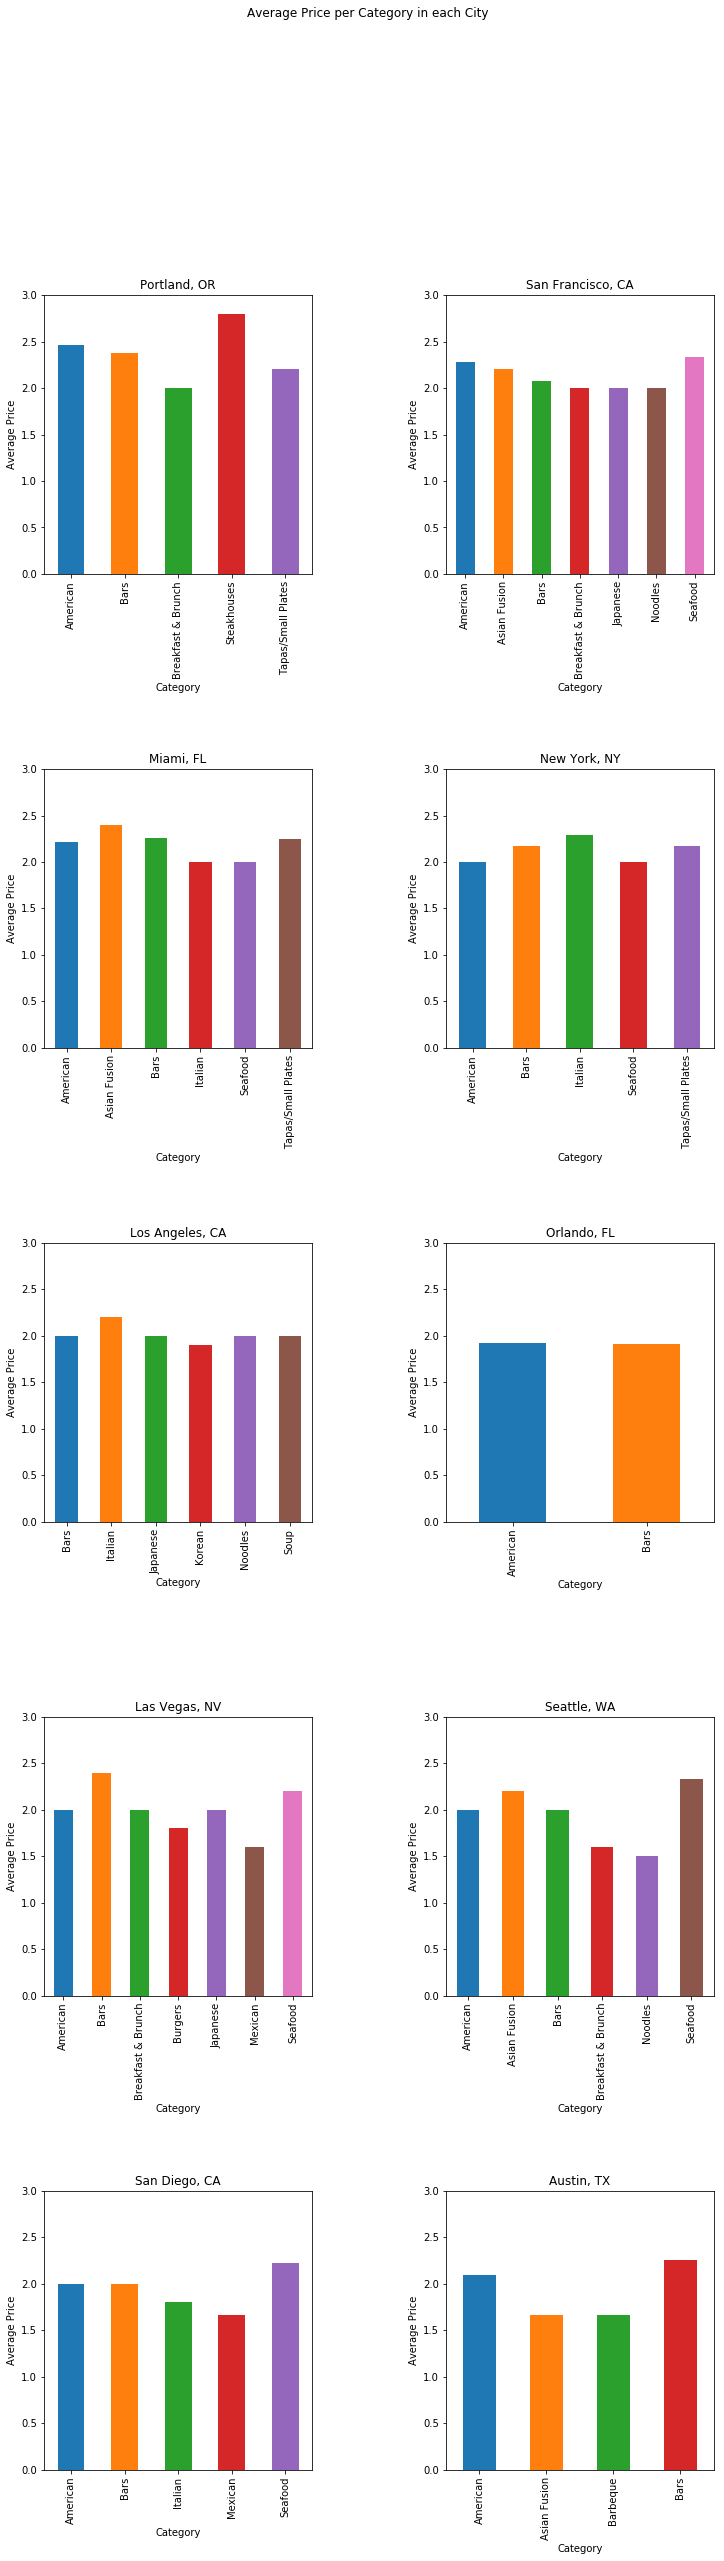

In [9]:
# Plots for average price per category for each city

# Create list to hold mean data for each city

mean_data = [avg_price_cat(portland_pd), avg_price_cat(sanfrancisco_pd), avg_price_cat(miami_pd), 
             avg_price_cat(newyork_pd), avg_price_cat(losangeles_pd), avg_price_cat(orlando_pd), 
             avg_price_cat(lasvegas_pd), avg_price_cat(seattle_pd), avg_price_cat(sandiego_pd), 
             avg_price_cat(austin_pd)
            ]

city_mean_pd = pd.DataFrame({'City' : cities, 'Data': mean_data})

fig = plt.figure(figsize = (12, 40))
fig.subplots_adjust(hspace = 0.7)
fig.subplots_adjust(wspace = 0.5)

for i in range(1,11):
    city_name = city_mean_pd['City']
    ax = plt.subplot(5, 2, i)
    city_mean_pd['Data'][i-1].plot(kind = 'bar')
    ax.title.set_text(city_name[i-1])
    plt.ylabel('Average Price')
    plt.ylim(0, 3)

fig.suptitle('Average Price per Category in each City')

# plt.show()

plt.savefig("Output/Average_Price_City.png")

In [10]:
# DataFrames for top 5 restaurants in each city

portland_top = top_five(portland_pd)
sanfrancisco_top = top_five(sanfrancisco_pd)
miami_top = top_five(miami_pd)
sanfrancisco_top = top_five(sanfrancisco_pd)
newyork_top = top_five(newyork_pd)
losangeles_top = top_five(losangeles_pd)
orlando_top = top_five(orlando_pd)
lasvegas_top = top_five(lasvegas_pd)
seattle_top = top_five(seattle_pd)
sandiego_top = top_five(sandiego_pd)
austin_top = top_five(austin_pd)

# Put them in a list

cities_top = [portland_top, sanfrancisco_top, miami_top, newyork_top, losangeles_top, orlando_top, lasvegas_top, 
             seattle_top, sandiego_top, austin_top]

# Display LA as an example
losangeles_top

,Name,Rating,Review Count,Price
523,Bottega Louie,4.0,16143,2
515,Daikokuya Little Tokyo,4.0,8071,2
519,Wurstküche,4.0,8017,2
496,Perch,4.0,6688,3
474,Bestia,4.5,5580,3


In [ ]:
# Generate coordinates for each city

city_coordinates = []

for city in cities:

    geocode_params = {"address": city, "key": gkey}
    geocode_base_url = (f'https://maps.googleapis.com/maps/api/geocode/json')
    
    print(f'Retrieving coordinates for {city}')

    geocode_response = requests.get(geocode_base_url, params = geocode_params).json()

    city_coordinates.append([(round(geocode_response["results"][0]["geometry"]["location"]["lat"], 2), 
                             round(geocode_response["results"][0]["geometry"]["location"]["lng"], 2))])

Retrieved coordinates for Portland, OR
Retrieved coordinates for San Francisco, CA
Retrieved coordinates for Miami, FL


In [ ]:
# Format restaurant info for top 5 restaurants in each city

city_info_text = []

for city in cities_top:
    city_info_text.append(info_box_text(city))

# DataFrame to hold gmaps data

gmaps_pd = pd.DataFrame({'City': cities, 'Coordinates': city_coordinates, 'Info_Box_Text' : city_info_text})

In [ ]:
# Generate map with markers for each city and restaurant info

gmaps.configure(api_key=gkey)

fig = gmaps.figure()

for index, row in gmaps_pd.iterrows():
    info_text = row['Info_Box_Text']
    coordinates = row['Coordinates']
    
    marker_layer_city = gmaps.marker_layer(coordinates, info_box_content = info_text)
    
    fig.add_layer(marker_layer_city)

fig